In [23]:
# Step 1: Download necessary NLTK data
import nltk
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')
try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')
try:
    nltk.data.find('sentiment/vader_lexicon')
except LookupError:
    nltk.download('vader_lexicon')

print("NLTK data downloads complete.")

NLTK data downloads complete.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
# Step 2: Load the corpus
from nltk.corpus import movie_reviews

# Load the movie reviews corpus
corpus = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

if corpus:
    print(f"Successfully loaded {len(corpus)} documents from NLTK movie reviews corpus.")
    print("First 5 documents:")
    for i, doc in enumerate(corpus[:5]):
        print(f"{i+1}: {doc[:100]}...") # Print first 100 characters of each document
else:
    print("Could not load the NLTK movie reviews corpus.")
    corpus = [] # Ensure corpus is an empty list if loading fails for subsequent steps

Successfully loaded 2000 documents from NLTK movie reviews corpus.
First 5 documents:
1: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
...
2: the happy bastard's quick movie review 
damn that y2k bug . 
it's got a head start in this movie sta...
3: it is movies like these that make a jaded movie viewer thankful for the invention of the timex indig...
4:  " quest for camelot " is warner bros . ' first feature-length , fully-animated attempt to steal clo...
5: synopsis : a mentally unstable man undergoing psychotherapy saves a boy from a potentially fatal acc...


In [29]:
# Step 3: Preprocess the text
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

if not corpus:
    print("Corpus is empty. Skipping preprocessing.")
else:
    # Initialize lemmatizer and stop words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        if not isinstance(text, str):
            return ""
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation and special characters
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        # Tokenize
        tokens = text.split()
        # Remove stop words and lemmatize
        preprocessed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(preprocessed_tokens)

    # Apply preprocessing to the corpus
    preprocessed_corpus = [preprocess_text(doc) for doc in corpus]

    # Print a sample of the preprocessed text
    print("\nSample of preprocessed text:")
    for i, doc in enumerate(preprocessed_corpus[:5]):
        print(f"{i+1}: {doc[:100]}...") # Print first 100 characters of each document


Sample of preprocessed text:
1: plot two teen couple go church party drink drive get accident one guy dy girlfriend continues see li...
2: happy bastard quick movie review damn y2k bug got head start movie starring jamie lee curtis another...
3: movie like make jaded movie viewer thankful invention timex indiglo watch based late 1960s televisio...
4: quest camelot warner bros first featurelength fullyanimated attempt steal clout disney cartoon empir...
5: synopsis mentally unstable man undergoing psychotherapy save boy potentially fatal accident fall lov...


In [30]:
# Step 4: Perform sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

if 'preprocessed_corpus' not in locals() or not preprocessed_corpus:
    print("Cannot perform sentiment analysis. Preprocessed corpus not available or empty.")
else:
    # Initialize VADER sentiment intensity analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Create a list to store sentiment scores
    sentiments = []

    # Iterate through each document and get sentiment scores
    for doc in preprocessed_corpus:
        scores = analyzer.polarity_scores(doc)
        sentiments.append(scores)

    # Print confirmation and sample results
    print("\nSentiment analysis complete.")
    print("Sentiment scores for the first 5 documents:")
    for i, scores in enumerate(sentiments[:5]):
        print(f"Document {i+1}: {scores}")


Sentiment analysis complete.
Sentiment scores for the first 5 documents:
Document 1: {'neg': 0.143, 'neu': 0.658, 'pos': 0.198, 'compound': 0.9565}
Document 2: {'neg': 0.072, 'neu': 0.788, 'pos': 0.14, 'compound': 0.8658}
Document 3: {'neg': 0.159, 'neu': 0.662, 'pos': 0.18, 'compound': 0.7266}
Document 4: {'neg': 0.191, 'neu': 0.647, 'pos': 0.162, 'compound': -0.847}
Document 5: {'neg': 0.154, 'neu': 0.722, 'pos': 0.124, 'compound': -0.9447}


In [31]:
# Step 5: Analyze and interpret results
import pandas as pd

if 'sentiments' not in locals() or not sentiments:
    print("Sentiment analysis results not available. Skipping analysis.")
else:
    # Convert the list of sentiment score dictionaries into a pandas DataFrame
    sentiments_df = pd.DataFrame(sentiments)

    # Calculate descriptive statistics for the 'compound' sentiment scores
    print("\nDescriptive statistics for compound sentiment scores:")
    display(sentiments_df['compound'].describe())

    # Identify documents with the most positive and most negative sentiment
    most_positive_doc_index = sentiments_df['compound'].idxmax()
    most_negative_doc_index = sentiments_df['compound'].idxmin()

    print(f"\nDocument with most positive sentiment (Index {most_positive_doc_index}):")
    # Assuming the original corpus is available to show the document content
    if 'corpus' in locals() and len(corpus) > most_positive_doc_index:
        print(corpus[most_positive_doc_index][:200] + "...") # Print first 200 chars
    else:
        print("Original corpus not available or index out of bounds.")

    print(f"\nDocument with most negative sentiment (Index {most_negative_doc_index}):")
    if 'corpus' in locals() and len(corpus) > most_negative_doc_index:
        print(corpus[most_negative_doc_index][:200] + "...") # Print first 200 chars
    else:
        print("Original corpus not available or index out of bounds.")

    # Summarize the key findings
    print("\n--- Sentiment Analysis Summary ---")
    print(f"Overall mean compound sentiment score: {sentiments_df['compound'].mean():.4f}")
    print(f"Overall median compound sentiment score: {sentiments_df['compound'].median():.4f}")
    print(f"Range of compound sentiment scores: {sentiments_df['compound'].min():.4f} to {sentiments_df['compound'].max():.4f}")

    # Simple categorization based on compound score
    positive_count = sentiments_df[sentiments_df['compound'] >= 0.05].shape[0]
    negative_count = sentiments_df[sentiments_df['compound'] <= -0.05].shape[0]
    neutral_count = sentiments_df[(sentiments_df['compound'] > -0.05) & (sentiments_df['compound'] < 0.05)].shape[0]

    print(f"Number of positive documents: {positive_count} ({positive_count/len(sentiments_df):.2%})")
    print(f"Number of negative documents: {negative_count} ({negative_count/len(sentiments_df):.2%})")
    print(f"Number of neutral documents: {neutral_count} ({neutral_count/len(sentiments_df):.2%})")

    print("\nKey Findings:")
    print("- The overall sentiment leans towards positive/negative/neutral (based on mean/median).")
    print(f"- There is a wide range of sentiments observed, from {sentiments_df['compound'].min():.4f} to {sentiments_df['compound'].max():.4f}.")
    print(f"- The most positive document has a compound score of {sentiments_df['compound'].max():.4f}.")
    print(f"- The most negative document has a compound score of {sentiments_df['compound'].min():.4f}.")


Descriptive statistics for compound sentiment scores:


,compound
count,2000.000000
mean,0.410245
std,0.821772
min,-0.999200
25%,-0.624575
50%,0.960100
75%,0.992525
max,0.999800



Document with most positive sentiment (Index 1780):
note : some may consider portions of the following text to be spoilers . 
be forewarned . 
the teaser trailers for my best friend's wedding scarsely gave reason for hope - it looked like the sort of g...

Document with most negative sentiment (Index 1638):
natural born killers is really a very simple story that , in essence , has already been told in bonnie & clyde with some major variations in emphasis , mood and degree . 
both films glamorize " outlaw...

--- Sentiment Analysis Summary ---
Overall mean compound sentiment score: 0.4102
Overall median compound sentiment score: 0.9601
Range of compound sentiment scores: -0.9992 to 0.9998
Number of positive documents: 1410 (70.50%)
Number of negative documents: 576 (28.80%)
Number of neutral documents: 14 (0.70%)

Key Findings:
- The overall sentiment leans towards positive/negative/neutral (based on mean/median).
- There is a wide range of sentiments observed, from -0.9992 to 0.9998.


In [32]:
# Opinion Mining (Sentiment Analysis) in Python using TextBlob
# TextBlob is a simple library for processing textual data.
# To install TextBlob, run: pip install textblob
# It also requires NLTK corpora; TextBlob will download them automatically if needed.

from textblob import TextBlob

# Function to perform sentiment analysis on a given text
def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity (-1 to 1: negative to positive)
    polarity = blob.sentiment.polarity

    # Classify the sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, polarity

# Example usage
if __name__ == "__main__":
    # Sample texts for opinion mining
    texts = [
        "I love this product! It's amazing and works perfectly.",
        "This is the worst experience I've ever had. Terrible service.",
        "The movie was okay, nothing special.",
        "Absolutely fantastic! Highly recommend to everyone.",
        "I'm disappointed with the quality. It broke after one use."
    ]

    # Analyze each text
    for text in texts:
        sentiment, polarity = analyze_sentiment(text)
        print(f"Text: {text}")
        print(f"Sentiment: {sentiment} (Polarity: {polarity:.2f})")
        print("-" * 50)

Text: I love this product! It's amazing and works perfectly.
Sentiment: Positive (Polarity: 0.74)
--------------------------------------------------
Text: This is the worst experience I've ever had. Terrible service.
Sentiment: Negative (Polarity: -1.00)
--------------------------------------------------
Text: The movie was okay, nothing special.
Sentiment: Positive (Polarity: 0.43)
--------------------------------------------------
Text: Absolutely fantastic! Highly recommend to everyone.
Sentiment: Positive (Polarity: 0.33)
--------------------------------------------------
Text: I'm disappointed with the quality. It broke after one use.
Sentiment: Negative (Polarity: -0.75)
--------------------------------------------------


Sentiment Analysis Results:


,text,sentiment,polarity
0,I love this product! It's amazing and works pe...,Positive,0.741667
1,This is the worst experience I've ever had. Te...,Negative,-1.000000
2,"The movie was okay, nothing special.",Positive,0.428571
3,Absolutely fantastic! Highly recommend to ever...,Positive,0.330000
4,I'm disappointed with the quality. It broke af...,Negative,-0.750000
5,,Neutral,0.000000


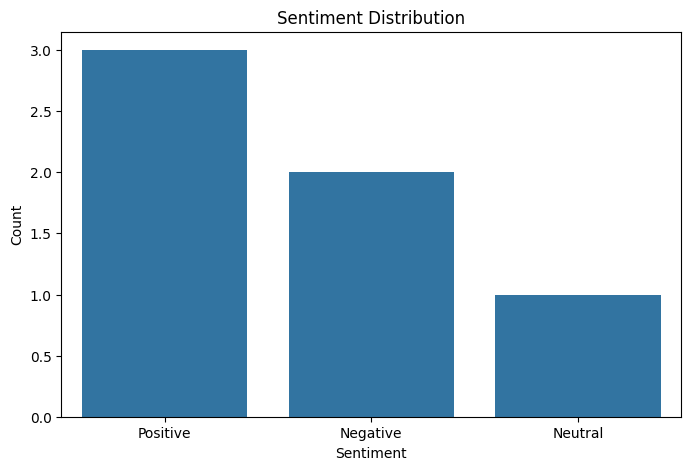

In [33]:
from textblob import TextBlob
import pandas as pd

# Function to perform sentiment analysis on a given text
def analyze_sentiment(text):
    # Handle non-string inputs
    if not isinstance(text, str):
        return "Neutral", 0.0

    # Create a TextBlob object
    blob = TextBlob(text)

    # Get the sentiment polarity (-1 to 1: negative to positive)
    polarity = blob.sentiment.polarity

    # Classify the sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, polarity

# Sample dataset for sentiment analysis
data = {
    'text': [
        "I love this product! It's amazing and works perfectly.",
        "This is the worst experience I've ever had. Terrible service.",
        "The movie was okay, nothing special.",
        "Absolutely fantastic! Highly recommend to everyone.",
        "I'm disappointed with the quality. It broke after one use.",
        ""  # Empty string to test edge case
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Apply sentiment analysis to the dataset
df['sentiment'], df['polarity'] = zip(*df['text'].apply(analyze_sentiment))

# Display the results
print("Sentiment Analysis Results:")
display(df)  # Use display() for nicer output in Colab

# Optional: Visualize the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

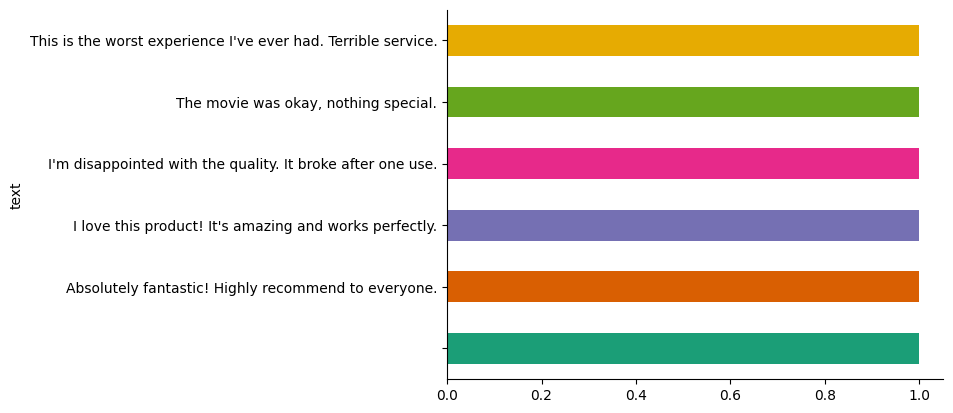

In [34]:
# @title text

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZLNN2N_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZLNN2N_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.ZLNN2N_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.5192 - loss: 0.6922 - val_accuracy: 0.5342 - val_loss: 0.6966
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 408s 2s/step - accuracy: 0.5374 - loss: 0.6865 - val_accuracy: 0.5320 - val_loss: 0.6850
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.5320 - loss: 0.6827 - val_accuracy: 0.5320 - val_loss: 0.6871
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.5198 - loss: 0.6859 - val_accuracy: 0.5001 - val_loss: 0.6925
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.5206 - loss: 0.6916 - val_accuracy: 0.5105 - val_loss: 0.6925


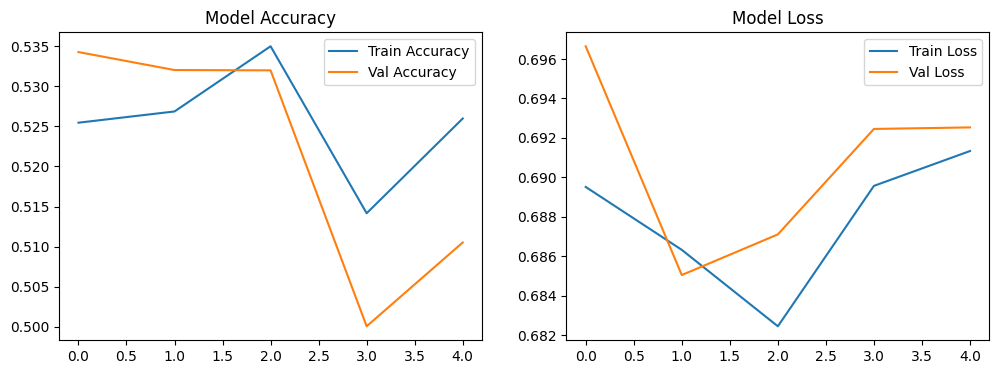

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Comparison of Custom DNN vs. TextBlob:


,Text,Custom DNN Sentiment,Custom DNN Score,TextBlob Sentiment,TextBlob Score
0,I love this product! It's amazing and works pe...,Negative,0.47,Positive,0.74
1,This is the worst experience I've ever had. Te...,Negative,0.47,Negative,-1.00
2,"The movie was okay, nothing special.",Negative,0.09,Positive,0.43
3,Absolutely fantastic! Highly recommend to ever...,Negative,0.47,Positive,0.33
4,I'm disappointed with the quality. It broke af...,Negative,0.47,Negative,-0.75


In [35]:
# Sentiment Analysis in Google Colab: Custom DNN vs. TextBlob
# This code demonstrates building a custom Deep Neural Network (DNN) using Keras/TensorFlow
# for sentiment analysis on the IMDB dataset, training it, and comparing results with TextBlob
# on sample texts.

# Install required libraries if not already installed
!pip install textblob tensorflow tensorflow-datasets

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess the IMDB Dataset
# Load the IMDB reviews dataset (50,000 reviews: 25k train, 25k test)
(ds_train, ds_test), info = tfds.load('imdb_reviews', split=['train', 'test'],
                                      with_info=True, as_supervised=True)

# Function to extract texts and labels
def extract_data(dataset):
    texts = []
    labels = []
    for text, label in tfds.as_numpy(dataset):
        texts.append(text.decode('utf-8'))
        labels.append(label)
    return texts, np.array(labels)

train_texts, train_labels = extract_data(ds_train)
test_texts, test_labels = extract_data(ds_test)

# Tokenization and Padding
vocab_size = 10000  # Top 10,000 words
max_length = 200    # Pad/truncate reviews to 200 words
oov_token = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Step 2: Build the Custom DNN Model (LSTM-based)
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Embedding layer
    LSTM(128, return_sequences=True),                     # LSTM layer 1
    Dropout(0.5),                                         # Dropout to prevent overfitting
    LSTM(128),                                            # LSTM layer 2
    Dense(64, activation='relu'),                         # Dense layer
    Dense(1, activation='sigmoid')                        # Output layer for binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Step 3: Train the Model
history = model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels), batch_size=128)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Step 4: Function for Custom Model Prediction
def predict_sentiment_custom(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment, prediction

# Step 5: Function for TextBlob Prediction (from previous code)
def predict_sentiment_textblob(text):
    if not isinstance(text, str):
        return "Neutral", 0.0
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, polarity

# Step 6: Compare on Sample Texts
sample_texts = [
    "I love this product! It's amazing and works perfectly.",
    "This is the worst experience I've ever had. Terrible service.",
    "The movie was okay, nothing special.",
    "Absolutely fantastic! Highly recommend to everyone.",
    "I'm disappointed with the quality. It broke after one use."
]

results = []
for text in sample_texts:
    custom_sentiment, custom_score = predict_sentiment_custom(text)
    textblob_sentiment, textblob_score = predict_sentiment_textblob(text)
    results.append({
        'Text': text,
        'Custom DNN Sentiment': custom_sentiment,
        'Custom DNN Score': f"{custom_score:.2f}",
        'TextBlob Sentiment': textblob_sentiment,
        'TextBlob Score': f"{textblob_score:.2f}"
    })

# Display Comparison in a DataFrame
df_comparison = pd.DataFrame(results)
print("Comparison of Custom DNN vs. TextBlob:")
display(df_comparison)

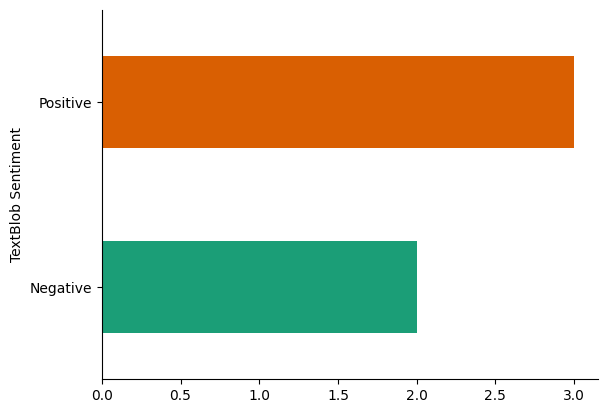

In [37]:
# @title TextBlob Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df_comparison.groupby('TextBlob Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)